In [3]:
from textstat.textstat import textstat
import csv
import pandas
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline
import ast

In [4]:
trump_df = pandas.read_csv('data/all_trump_w_topics.csv')
trump_df['candidate'] = 'trump'
clinton_df = pandas.read_csv('data/all_clinton_w_topics.csv')
clinton_df['candidate'] = 'clinton'
sanders_df = pandas.read_csv('data/all_sanders_w_topics.csv')
sanders_df['candidate'] = 'sanders'
cruz_df = pandas.read_csv('data/all_cruz_w_topics.csv')
cruz_df['candidate'] = 'cruz'
ORGS = ['nyt', 'wsj', 'cnn', 'fox', 'ap', 'reuters', 'politico', 'mcclatchy', 'buzzfeed', 'huffpo','latimes']


In [5]:
n = len(clinton_df) 
clinton_df.index = xrange(len(trump_df), (len(trump_df) + n))
m = len(sanders_df)
sanders_df.index = xrange(max(clinton_df.index), max(clinton_df.index) + m)
c = len(cruz_df)
cruz_df.index = xrange(max(sanders_df.index), max(sanders_df.index) + c)

In [6]:
all_df = pandas.concat([trump_df,clinton_df, sanders_df, cruz_df]) 
all_df['gunning_fog'] = all_df['body'].apply(lambda x: textstat.gunning_fog(x) if type(x) == str else None)
all_df['flesch'] = all_df['body'].apply(lambda x: textstat.flesch_kincaid_grade(x) if type(x) == str else None)
all_df['readability'] = all_df['body'].apply(lambda x: textstat.flesch_reading_ease(x) if type(x) == str else None)

# Convert topics to Dict and Filter by > 0.1

In [9]:
all_df['topic_dict'] = all_df['topic'].apply(lambda d: ast.literal_eval(d))
all_df['top_topics'] = all_df['topic_dict'].apply(lambda d: {k:v for k, v in d.iteritems() if v > 0.1})
all_df['topic_list'] = all_df['top_topics'].apply(lambda d: d.keys()) 
all_df['top_topic'] = all_df['topic_dict'].apply(lambda d: max(d, key=lambda i: d[i]))

# Breakdown of Story Topics

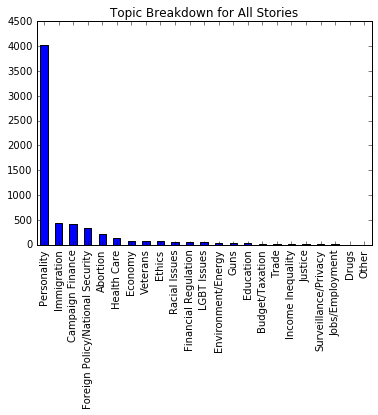

In [10]:
all_df['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for All Stories")
# Top 10: Personality, Immigration, Campaign Finance, Foreign Policy/National Security, Abortion
# Health Care, Economy, Veterans, Ethics, Racial Issues 

## Now Remove Personality Topic (Which is Other)

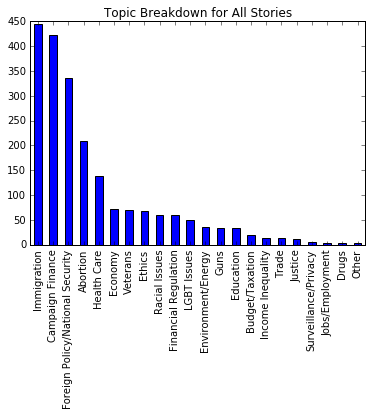

In [11]:
all_df = all_df[all_df['top_topic'] != 'Personality']
all_df['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for All Stories")
# Top 10: Personality, Immigration, Campaign Finance, Foreign Policy/National Security, Abortion
# Health Care, Economy, Veterans, Ethics, Racial Issues 

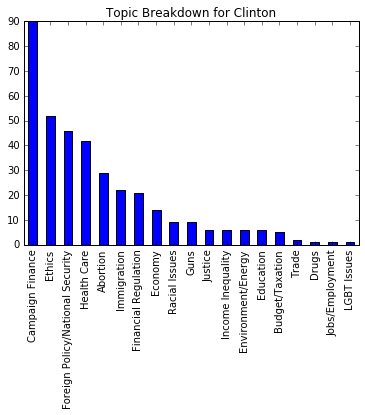

In [12]:
all_df[all_df['candidate'] == 'clinton']['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for Clinton")

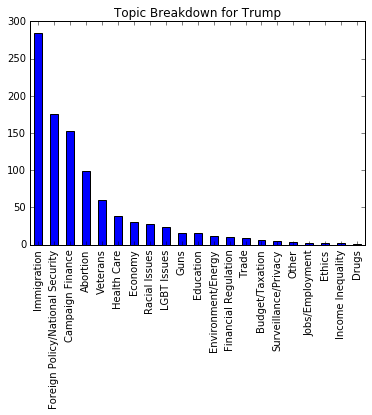

In [13]:
all_df[all_df['candidate'] == 'trump']['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for Trump")

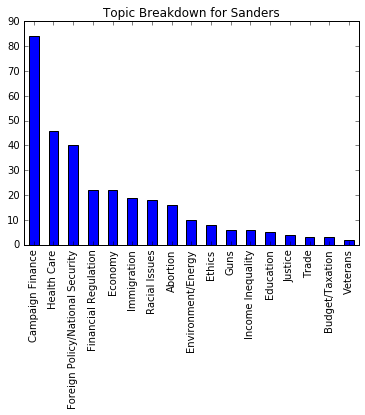

In [14]:
all_df[all_df['candidate'] == 'sanders']['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for Sanders")

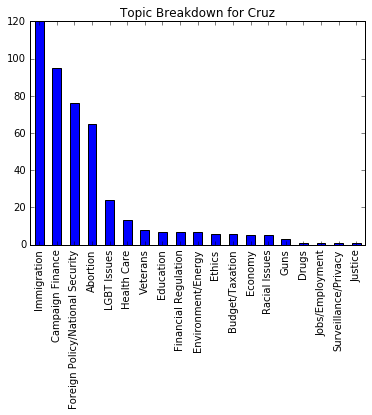

In [15]:
all_df[all_df['candidate'] == 'cruz']['top_topic'].value_counts().plot(kind="bar", title="Topic Breakdown for Cruz")

## Reading Level Breakdown by Topic

In [16]:
# Top 10: Personality, Immigration, Campaign Finance, Foreign Policy/National Security, Abortion
# Health Care, Economy, Veterans, Ethics, Racial Issues 

TOPICS = ['Immigration', 'Campaign Finance', 'Foreign Policy/National Security',
         'Abortion', 'Health Care', 'Economy', 'Veterans', 'Ethics', 'Racial Issues', 'Financial Regulation']

print "Average Flesch Scores by Topic"
for t in TOPICS:
    df_t = all_df[all_df['top_topic'] == t]
    print t, ":", '%.2f' % df_t['flesch'].mean()

Average Flesch Scores by Topic
Immigration : 9.28
Campaign Finance : 9.01
Foreign Policy/National Security : 9.19
Abortion : 9.08
Health Care : 9.86
Economy : 9.75
Veterans : 9.06
Ethics : 10.90
Racial Issues : 9.93
Financial Regulation : 9.74


## Topic Breakdown By Candidate

In [26]:
CANDIDATES = ['clinton', 'sanders', 'trump', 'cruz']
for c in CANDIDATES:
    print c 
    print "\t\t\t\t\t%"
    print 100* all_df[all_df['candidate'] == c]['top_topic'].value_counts(normalize=True)[:5]
    print

clinton
					%
Campaign Finance                    24.456522
Ethics                              14.130435
Foreign Policy/National Security    12.500000
Health Care                         11.413043
Abortion                             7.880435
Name: top_topic, dtype: float64

sanders
					%
Campaign Finance                    26.751592
Health Care                         14.649682
Foreign Policy/National Security    12.738854
Financial Regulation                 7.006369
Economy                              7.006369
Name: top_topic, dtype: float64

trump
					%
Immigration                         29.128205
Foreign Policy/National Security    17.948718
Campaign Finance                    15.692308
Abortion                            10.153846
Veterans                             6.153846
Name: top_topic, dtype: float64

cruz
					%
Immigration                         26.607539
Campaign Finance                    21.064302
Foreign Policy/National Security    16.851441
Abortion          

## Average Reading Scores by Candidate per Topic

In [45]:
CANDIDATES = ['clinton', 'sanders', 'trump', 'cruz']
for c in CANDIDATES:
    print c, 'average Flesch score', '%.2f' % all_df[all_df['candidate'] == c]['flesch'].mean()
print
for t in TOPICS: 
    scores = []
    for c in CANDIDATES:
         scores.append((c,all_df[(all_df['candidate'] == c) & (all_df['top_topic'] == t)]['flesch'].mean(),\
                       len(all_df[(all_df['candidate'] == c ) & (all_df['top_topic'] == t)]))) 
    scores.sort(key=lambda x: x[1], reverse=True)
    
    print t
    for s in scores:
        print s[0], '%.2f' % s[1], "avg", "(", s[2], "stories )"
    print

clinton average Flesch score 10.06
sanders average Flesch score 9.96
trump average Flesch score 9.07
cruz average Flesch score 8.94

Immigration
sanders 10.19 avg ( 19 stories )
clinton 10.09 avg ( 22 stories )
trump 9.31 avg ( 284 stories )
cruz 8.91 avg ( 120 stories )

Campaign Finance
sanders 9.40 avg ( 84 stories )
clinton 9.34 avg ( 90 stories )
trump 8.79 avg ( 153 stories )
cruz 8.73 avg ( 95 stories )

Foreign Policy/National Security
clinton 10.16 avg ( 46 stories )
sanders 9.77 avg ( 40 stories )
trump 8.93 avg ( 175 stories )
cruz 8.89 avg ( 76 stories )

Abortion
clinton 10.19 avg ( 29 stories )
sanders 9.45 avg ( 16 stories )
cruz 8.90 avg ( 65 stories )
trump 8.81 avg ( 99 stories )

Health Care
sanders 10.52 avg ( 46 stories )
clinton 9.85 avg ( 42 stories )
cruz 9.55 avg ( 13 stories )
trump 9.16 avg ( 38 stories )

Economy
clinton 10.42 avg ( 14 stories )
sanders 9.98 avg ( 22 stories )
trump 9.48 avg ( 30 stories )
cruz 8.50 avg ( 5 stories )

Veterans
clinton nan av

## Story Distrubtion Per Candidate


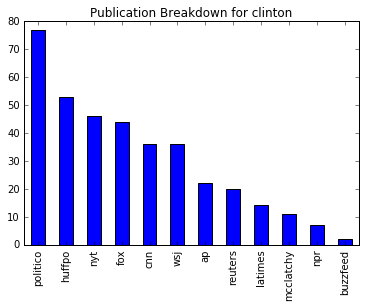

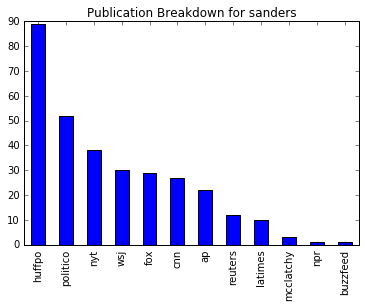

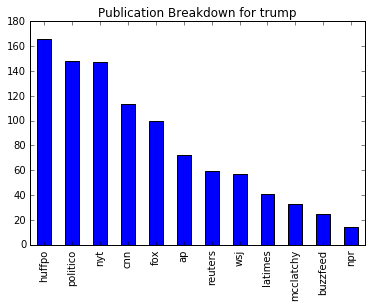

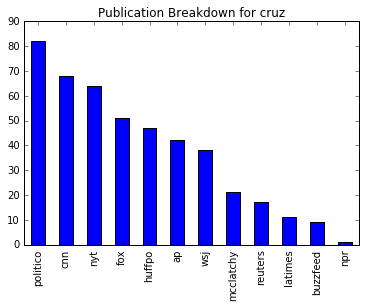

In [46]:
CANDIDATES = ['clinton', 'sanders', 'trump', 'cruz']

# Average reading level per pub

for c in CANDIDATES: 
    all_df[all_df['candidate'] == c]['org'].value_counts().plot(kind="bar", title="Publication Breakdown for " + c)
    matplotlib.pyplot.show() 

In [47]:
#all_df[(all_df['candidate']=='trump') & (all_df['top_topic'] == 'Veterans')]